Name:        Pruthviraj Jadhav<br >
Roll no.:    2018IMT-041 <br >
Course:      Machine Learning <br >
Course Code: ITIT 4107-2021 <br >
Assignment-4 <br >
Deadline: 18th Oct 2021 <br >

##Problem:

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss.
1. Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
2. Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition. 
3. Plot the model alongside the scatterplot to show the fit model.
4. Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.
5. For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AlfTang/Linear-Regression/master/ex1data1.txt",names = ['population','profit'],header = None)

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Visualizing the Data

Text(0, 0.5, 'Profit')

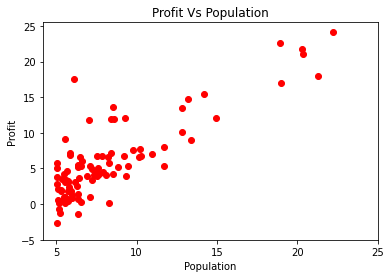

In [5]:
plt.scatter(df['population'],df['profit'],color='red')
plt.title("Profit Vs Population")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population")
plt.ylabel("Profit")

In [6]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [7]:
data_n=df.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
computeCost(X,y,theta)

32.072733877455676

In [8]:

def gradientDescent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [9]:
def plot_model_fit(alpha,theta):
    plt.scatter(df['population'],df['profit'],color='red')
    plt.title("Profit vs Population with alpha = {}\n".format(alpha))
    x_value=[x for x in range(25)]
    y_value=[y*theta[1]+theta[0] for y in x_value]
    plt.plot(x_value,y_value,color="blue")
    plt.xticks(np.arange(5,30,step=5))
    plt.yticks(np.arange(-5,30,step=5))
    plt.xlabel("Population")
    plt.ylabel("Profit")

def func(i):
  theta=np.zeros((2,1))
  alpha = alpha_values[i]
  theta,J_history = gradientDescent(X,y,theta,alpha,150)
  print('The ALPHA value, learning_rate: {}'.format(alpha))
  print('The THETA value: {}'.format(theta))
  print('\nHypothesis Function:')
  print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
  J_histories.append(J_history)
  plot_model_fit(alpha,theta)

Alpha values: (10) [0.001  0.0035 0.006  0.0085 0.011  0.0135 0.016  0.0185 0.021  0.0235]
The ALPHA value, learning_rate: 0.001
The THETA value: [[-0.02633221]
 [ 0.80430349]]

Hypothesis Function:
h(x) =-0.03 + 0.8x1


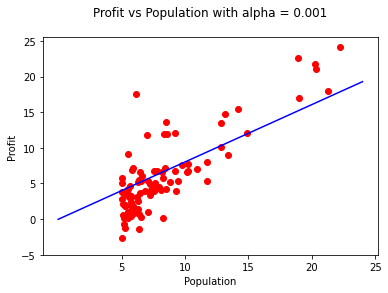

In [10]:

alpha_values = np.arange(0.001, 0.025, 0.0025)
J_histories =[]

print("Alpha values: ({})".format(len(alpha_values)), alpha_values)
func(0)


The ALPHA value, learning_rate: 0.0035
The THETA value: [[-0.27935101]
 [ 0.82972404]]

Hypothesis Function:
h(x) =-0.28 + 0.83x1


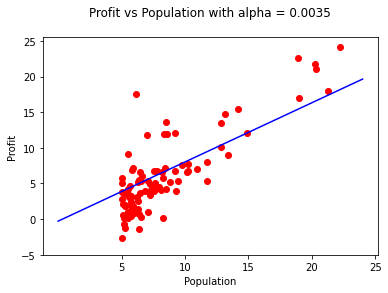

In [11]:
func(1)

The ALPHA value, learning_rate: 0.006
The THETA value: [[-0.51592847]
 [ 0.85349081]]

Hypothesis Function:
h(x) =-0.52 + 0.85x1


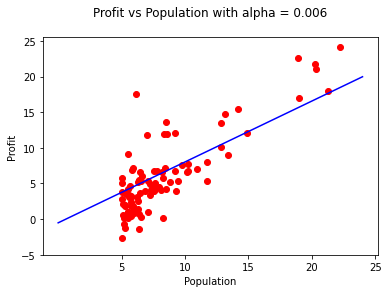

In [12]:
func(2)

The ALPHA value, learning_rate: 0.0085
The THETA value: [[-0.73712608]
 [ 0.87571251]]

Hypothesis Function:
h(x) =-0.74 + 0.88x1


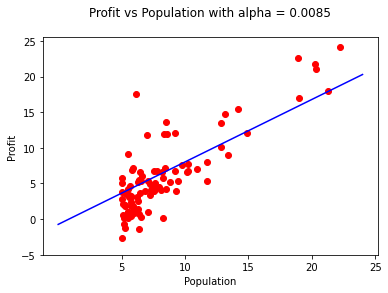

In [13]:
func(3)

The ALPHA value, learning_rate: 0.011
The THETA value: [[-0.9439374 ]
 [ 0.89648895]]

Hypothesis Function:
h(x) =-0.94 + 0.9x1


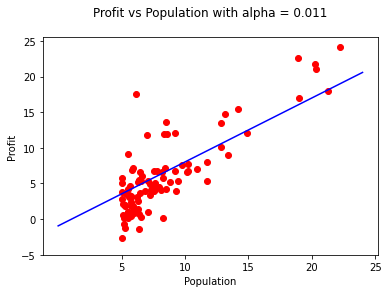

In [14]:
func(4)

The ALPHA value, learning_rate: 0.013500000000000002
The THETA value: [[-1.13729223]
 [ 0.91591354]]

Hypothesis Function:
h(x) =-1.14 + 0.92x1


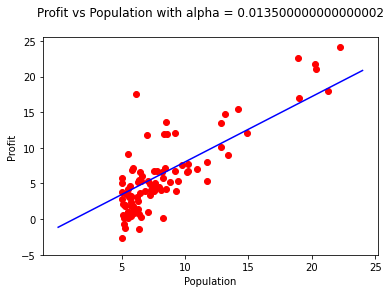

In [15]:
func(5)

The ALPHA value, learning_rate: 0.016
The THETA value: [[-1.31806062]
 [ 0.93407368]]

Hypothesis Function:
h(x) =-1.32 + 0.93x1


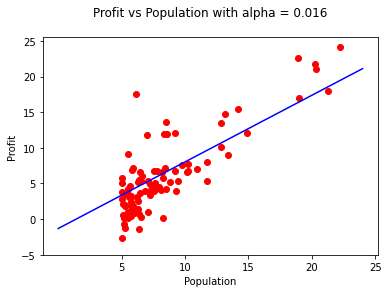

In [16]:
func(6)

The ALPHA value, learning_rate: 0.018500000000000003
The THETA value: [[-1.48705676]
 [ 0.95105118]]

Hypothesis Function:
h(x) =-1.49 + 0.95x1


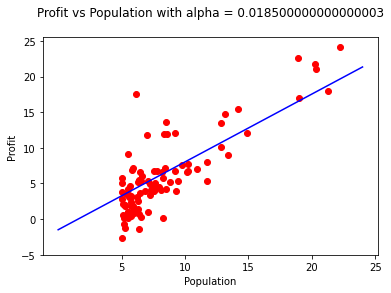

In [17]:
func(7)

The ALPHA value, learning_rate: 0.021
The THETA value: [[-1.64504249]
 [ 0.96692256]]

Hypothesis Function:
h(x) =-1.65 + 0.97x1


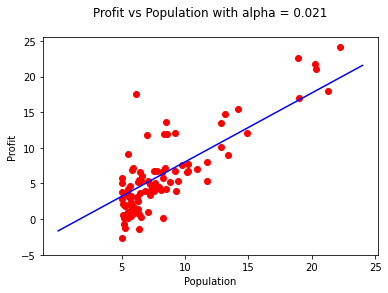

In [18]:
func(8)

The ALPHA value, learning_rate: 0.0235
The THETA value: [[-1.7927328 ]
 [ 0.98173806]]

Hypothesis Function:
h(x) =-1.79 + 0.98x1


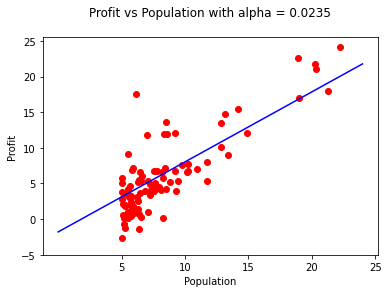

In [19]:
func(9)

In [20]:

x = np.arange(1,188,1.25)
y = alpha_values
len(x)

150

In [21]:
print(min(min(J_histories)))
max(max(J_histories))

5.270232386988781


28.63668943325086

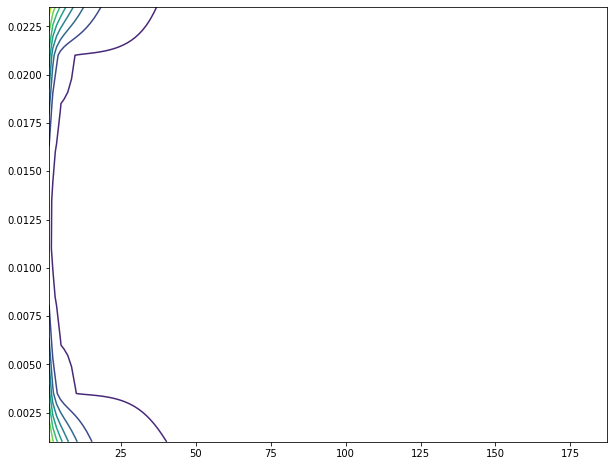

In [22]:
z = J_histories
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
ax.contour(x,y,z)
plt.show()

In [23]:
x.shape

(150,)

In [24]:
import plotly.graph_objects as go



fig = go.Figure(data=go.Contour(
	x=x, y=y, z=z,
	contours=dict(
		coloring='lines',
		showlabels=True,),
    line_width=2
))

fig.show()

# x -> Value of the cost function
# y -> Learning rates
# z -> The value of the cost function at a given learning rate alpha


##Inference

If slope is +ve : $\theta$j = $\theta$j – (+ve value). Hence value of $\theta$j decreases. <br >
If slope is -ve : $\theta$j = $\theta$j – (-ve value). Hence value of $\theta$j increases. <br >
The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time:
<br >- If we choose α to be very large, Gradient Descent can overshoot the minimum. It may fail to converge or even diverge.
<br >- 	If we choose α to be very small, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima.

